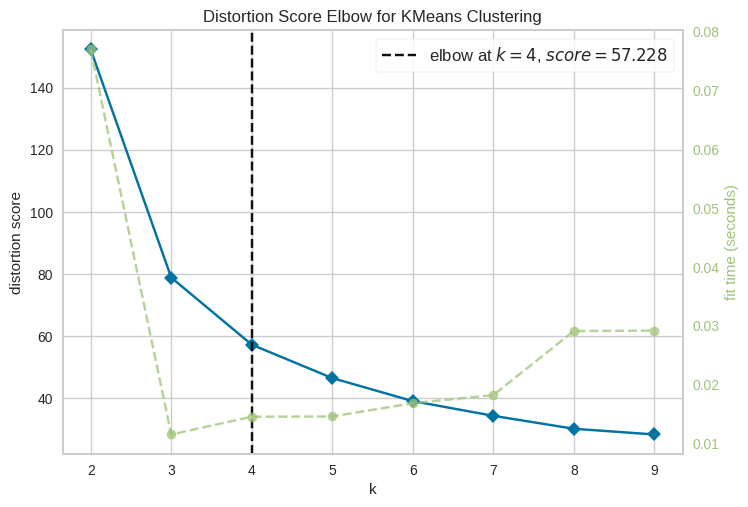

In [2]:
# Use this code to visualize Elbow Method.

#install yellowbrick to vizualize the Elbow curve
#pip install yellowbrick

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show(); # Finalize and render the figure

# Data Prepare

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#yolcu sayısına göre ve uhava yolları çus sayısına göre clustring yap

In [ ]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [ ]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [ ]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

<Figure size 1500x1500 with 0 Axes>

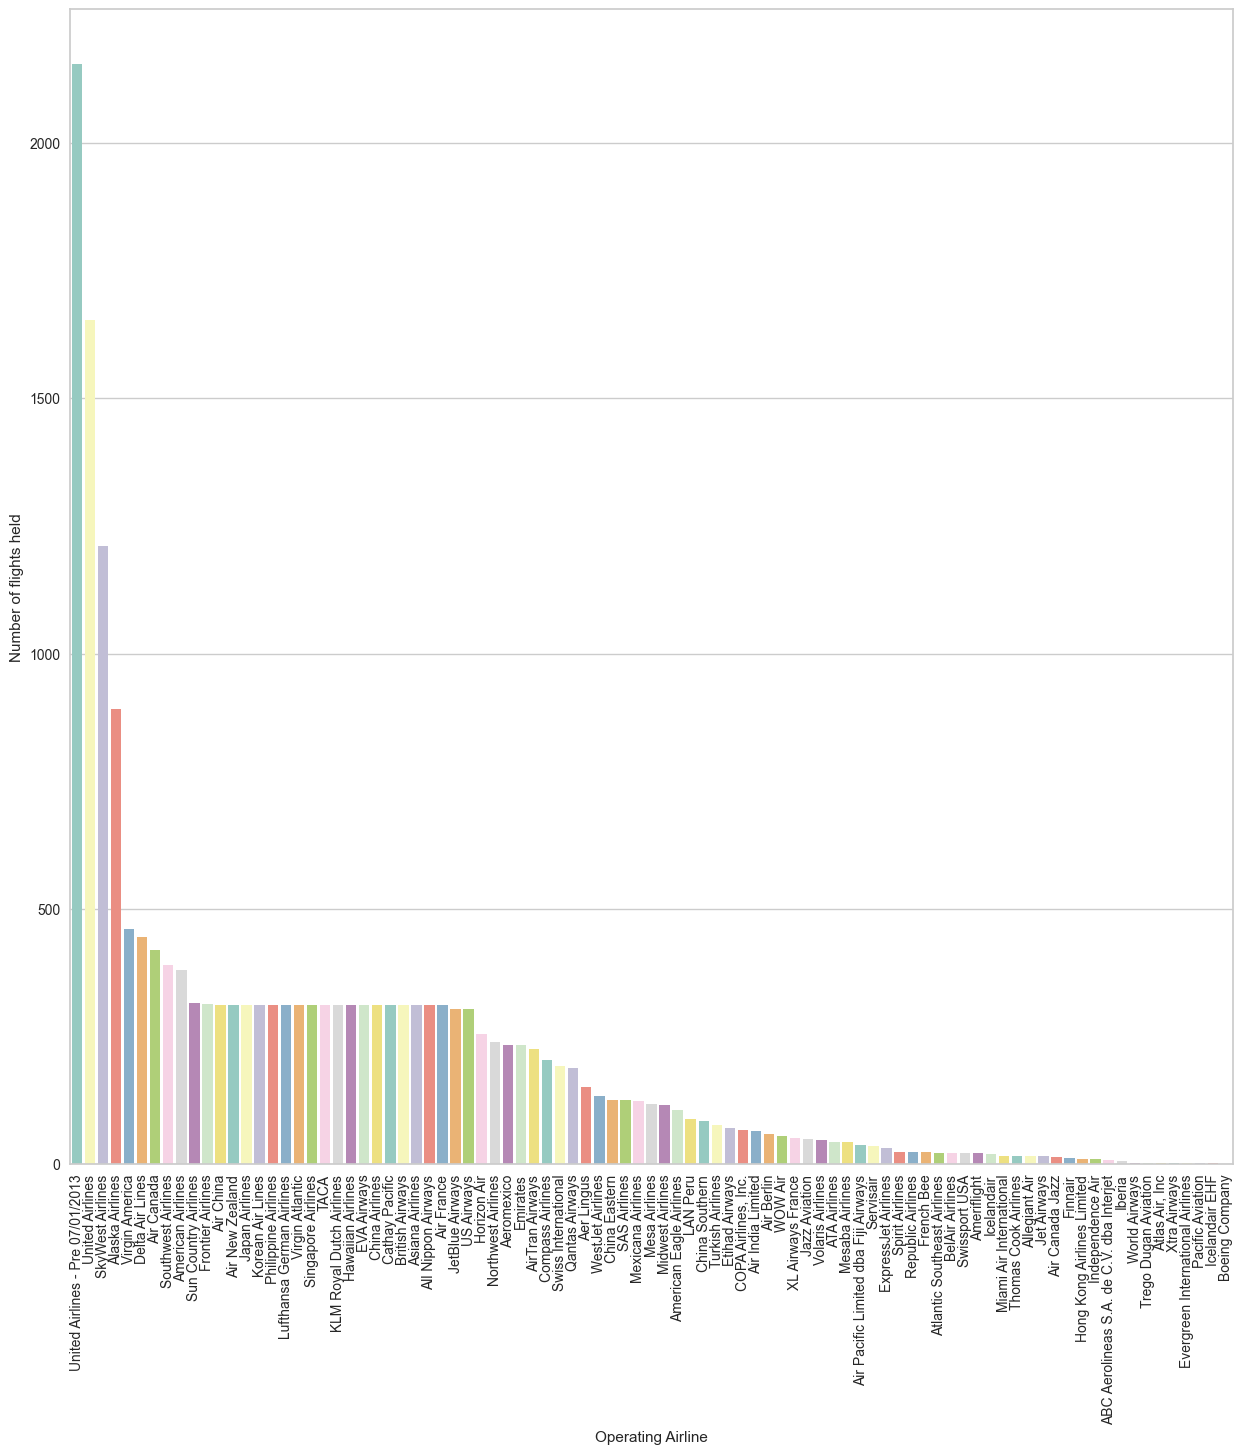

In [ ]:
plt.figure(figsize=(15, 15))

# Create a sorted order based on value counts in ascending order
sorted_order = df['Operating Airline'].value_counts(ascending=False).index

# Create the count plot with the sorted order
sns.countplot(x="Operating Airline", palette="Set3", data=df, order=sorted_order)

plt.xticks(rotation=90)
plt.ylabel("Number of flights held")
plt.show();

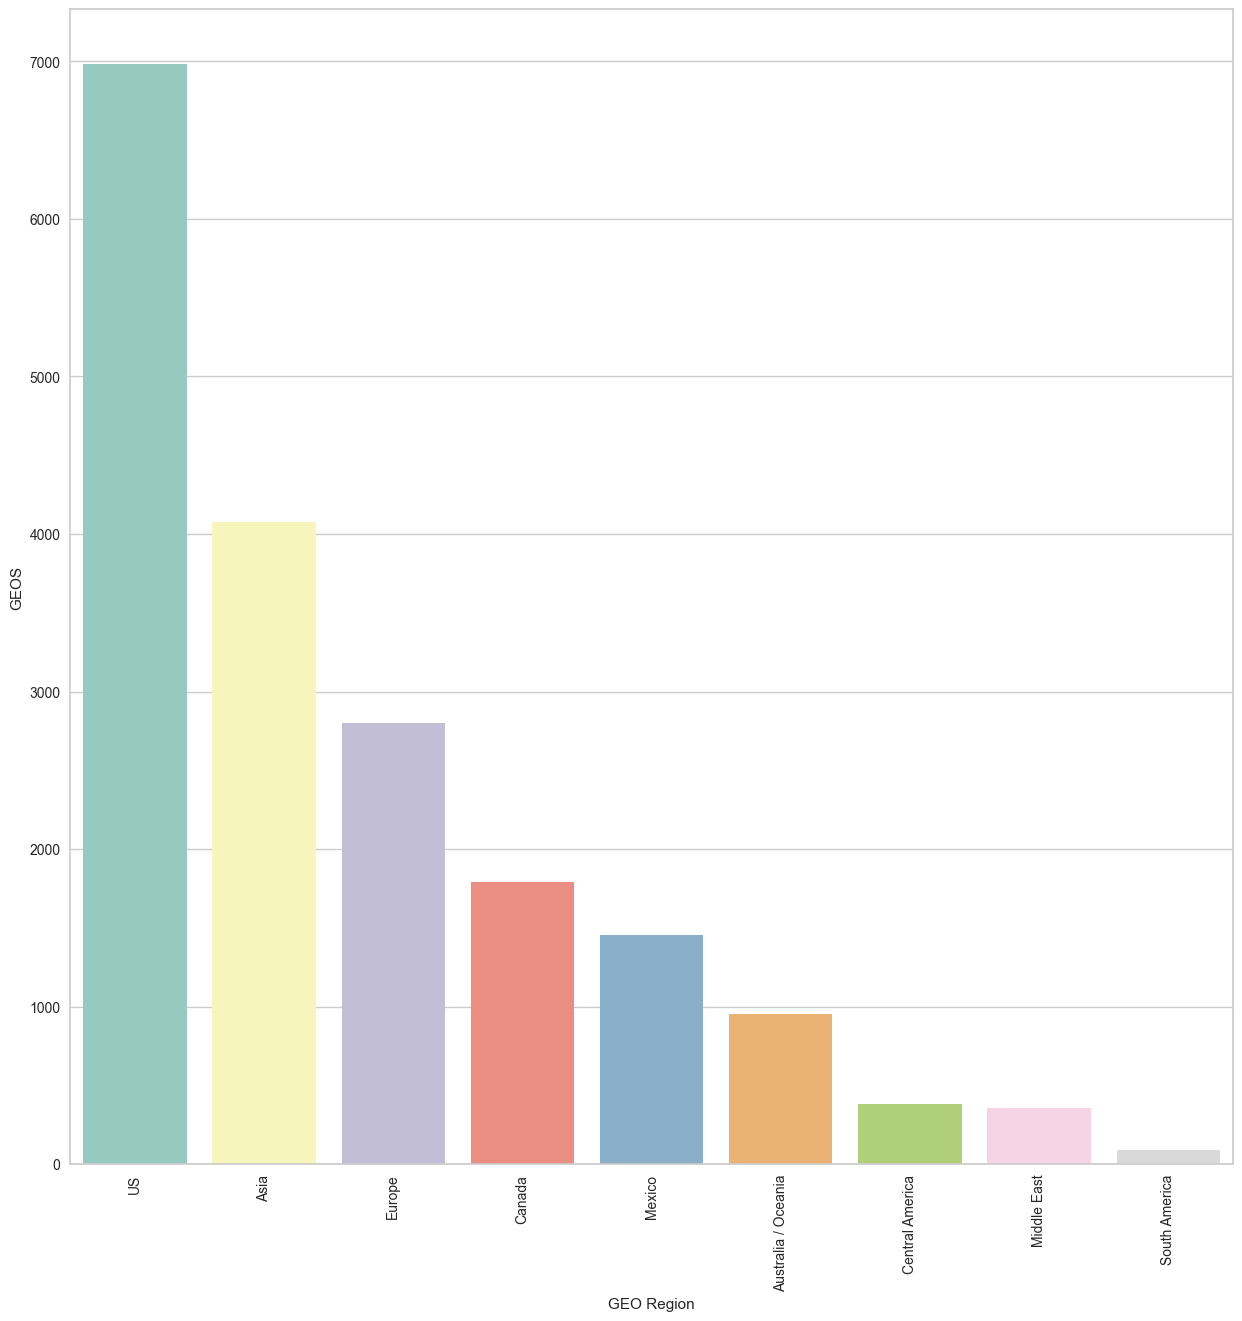

In [ ]:
plt.figure(figsize=(15, 15))

# Create a sorted order based on value counts in ascending order
sorted_order = df['GEO Region'].value_counts(ascending=False).index

# Create the count plot with the sorted order
sns.countplot(x="GEO Region", palette="Set3", data=df, order=sorted_order)

plt.xticks(rotation=90)
plt.ylabel("GEOS")
plt.show();

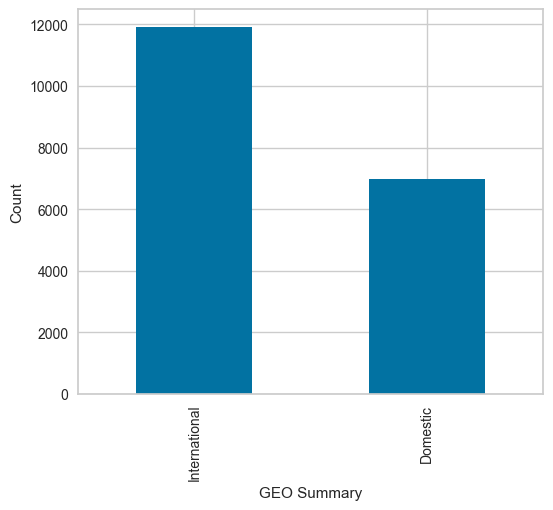

In [ ]:
plt.figure(figsize=(6, 5))
df["GEO Summary"].value_counts().plot(kind='bar')
plt.xlabel("GEO Summary")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Activity Type Code"].value_counts()

Activity Type Code
Enplaned          8930
Deplaned          8909
Thru / Transit    1046
Name: count, dtype: int64

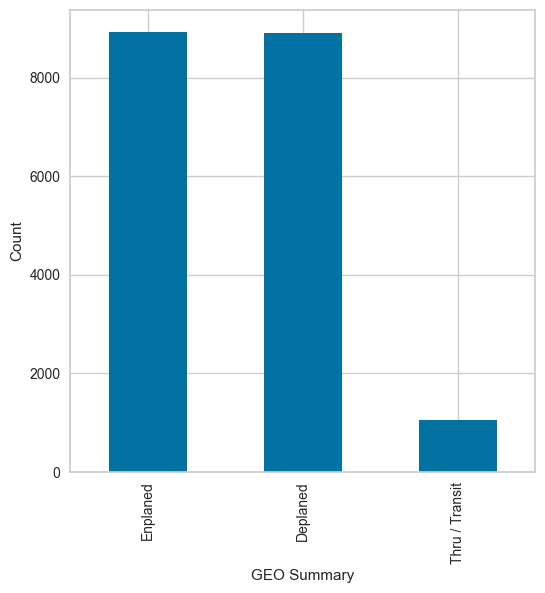

In [ ]:
plt.figure(figsize=(6, 6))
df["Activity Type Code"].value_counts().plot(kind='bar')
plt.xlabel("GEO Summary")
plt.ylabel("Count")
plt.show()

In [ ]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [ ]:
# Date ayırma
df["Activity Period"] = df["Activity Period"].astype(str)

df["Year"] = df["Activity Period"].str[:4]   # İlk 4 karakter yılı temsil eder
df["Month"] = df["Activity Period"].str[4:]  # Son 2 karakter ayı temsil eder

df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].astype(int)
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


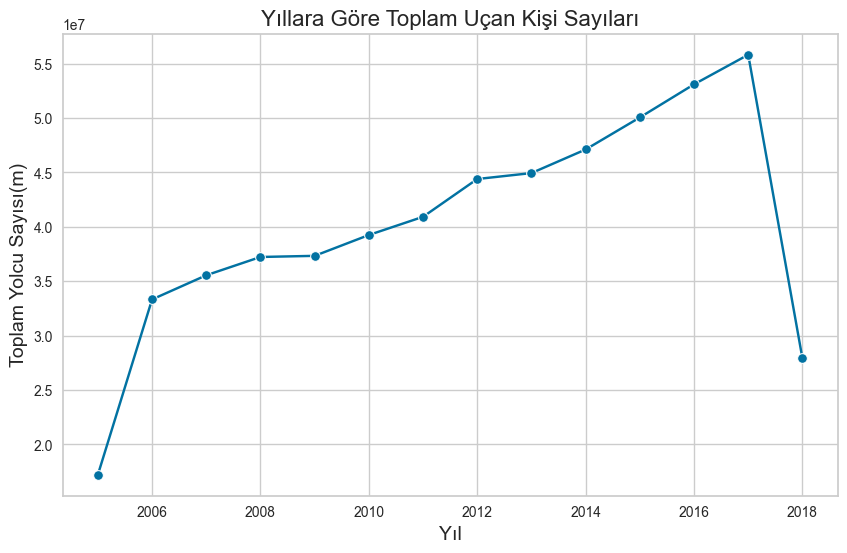

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

yearly_flight_counts = df.groupby("Year")["Passenger Count"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Passenger Count", data=yearly_flight_counts, marker="o")

plt.title("Yıllara Göre Toplam Uçan Kişi Sayıları", fontsize=16)
plt.xlabel("Yıl", fontsize=14)
plt.ylabel("Toplam Yolcu Sayısı(m)", fontsize=14)

plt.show()

# 2018 verisinin sadece 6 ayı olduğu için grafik düşmüş gibi gözüküyor

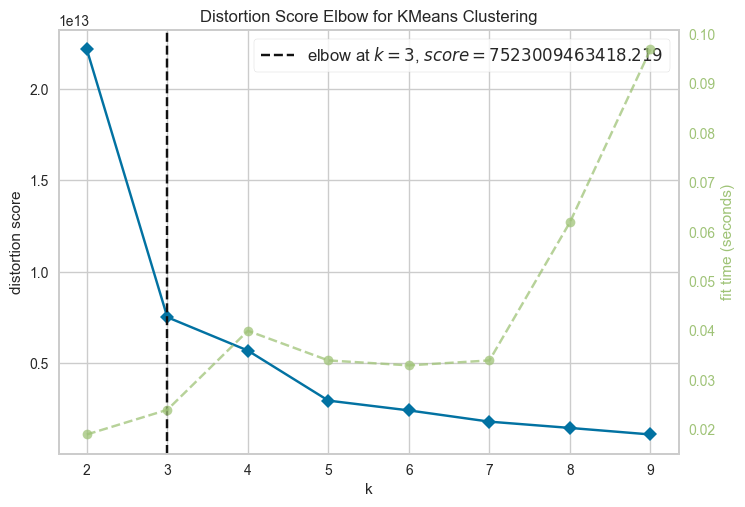

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variable 'Operating Airline'
le = LabelEncoder()
df["Operating Airline"] = le.fit_transform(df["Operating Airline"])

# Prepare the data
X = df[["Operating Airline", "Passenger Count"]]

km = KMeans(random_state=42)
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(X)
vis.show();

In [ ]:
Kmodel = KMeans(3)
Kmodel = Kmodel.fit(X)
Ktahmin = Kmodel.predict(X)
Ktahmin

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X["cluster"]=Ktahmin

In [ ]:
silhouette_score(X,Ktahmin)

0.8286476457027824

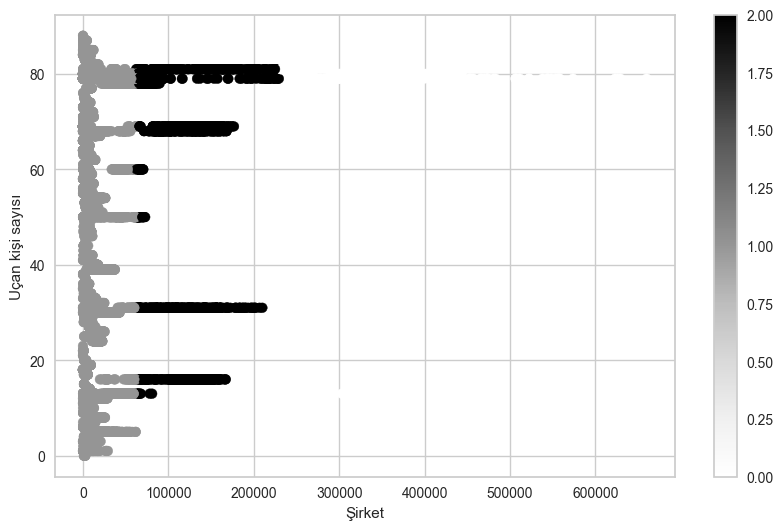

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X["Passenger Count"],X["Operating Airline"], c=Ktahmin)
plt.colorbar()
plt.xlabel("Şirket")
plt.ylabel("Uçan kişi sayısı")
plt.show();

In [4]:
df3 = pd.read_csv("air-traffic-passenger-statistics.csv")

In [7]:
df3["Activity Period"] = df3["Activity Period"].astype(str)

df3["Year"] = df3["Activity Period"].str[:4]   # İlk 4 karakter yılı temsil eder
df3["Month"] = df3["Activity Period"].str[4:]  # Son 2 karakter ayı temsil eder

df3["Year"] = df3["Year"].astype(int)
df3["Month"] = df3["Month"].astype(int)
df3.drop("Activity Period",axis=1,inplace=True)
df3.head()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Operating Airline            18885 non-null  object
 1   Operating Airline IATA Code  18822 non-null  object
 2   Published Airline            18885 non-null  object
 3   Published Airline IATA Code  18822 non-null  object
 4   GEO Summary                  18885 non-null  object
 5   GEO Region                   18885 non-null  object
 6   Activity Type Code           18885 non-null  object
 7   Price Category Code          18885 non-null  object
 8   Terminal                     18885 non-null  object
 9   Boarding Area                18885 non-null  object
 10  Passenger Count              18885 non-null  int64 
 11  Year                         18885 non-null  int64 
 12  Month                        18885 non-null  int64 
dtypes: int64(3), object(10)
memory 

In [10]:
# Operating Airline IATA Code filling
df3["Operating Airline IATA Code"] = df3["Operating Airline IATA Code"].fillna("Unknown")

# Published Airline IATA Code filling
df3["Published Airline IATA Code"] = df3["Published Airline IATA Code"].fillna("Unknown")

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Operating Airline            18885 non-null  object
 1   Operating Airline IATA Code  18885 non-null  object
 2   Published Airline            18885 non-null  object
 3   Published Airline IATA Code  18885 non-null  object
 4   GEO Summary                  18885 non-null  object
 5   GEO Region                   18885 non-null  object
 6   Activity Type Code           18885 non-null  object
 7   Price Category Code          18885 non-null  object
 8   Terminal                     18885 non-null  object
 9   Boarding Area                18885 non-null  object
 10  Passenger Count              18885 non-null  int64 
 11  Year                         18885 non-null  int64 
 12  Month                        18885 non-null  int64 
dtypes: int64(3), object(10)
memory 

In [11]:
# df3 get dummies auto select
df3 = pd.get_dummies(df3, drop_first=True)
df3.head()

,Passenger Count,Year,Month,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,...,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other
0,27271,2005,7,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,29131,2005,7,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2,5415,2005,7,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,35156,2005,7,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
4,34090,2005,7,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False


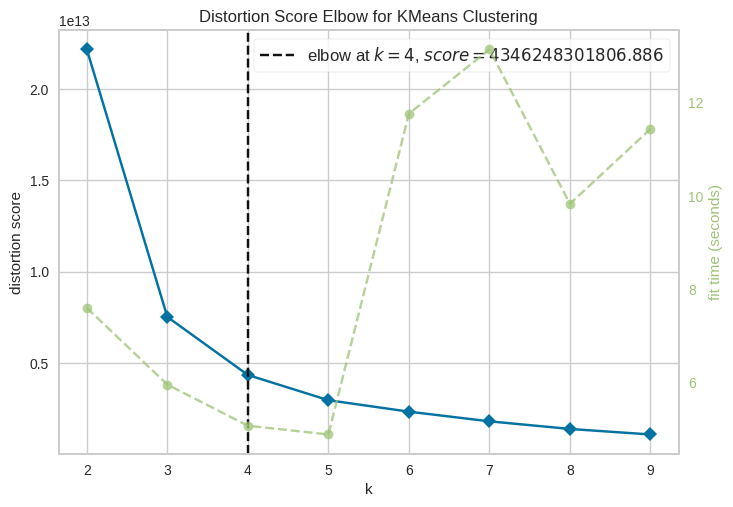

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
vis = KElbowVisualizer(km,k=(2,10))
vis.fit(df3)
vis.show() # optimum bulma

In [14]:
Kmodel = KMeans(4)
Kmodel = Kmodel.fit(df3)
Ktahmin = Kmodel.predict(df3)
Ktahmin

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [15]:
df3["cluster"]=Ktahmin

In [16]:
silhouette_score(df3,Ktahmin)

0.786152221930978

In [ ]:
### with cursor, scaled data

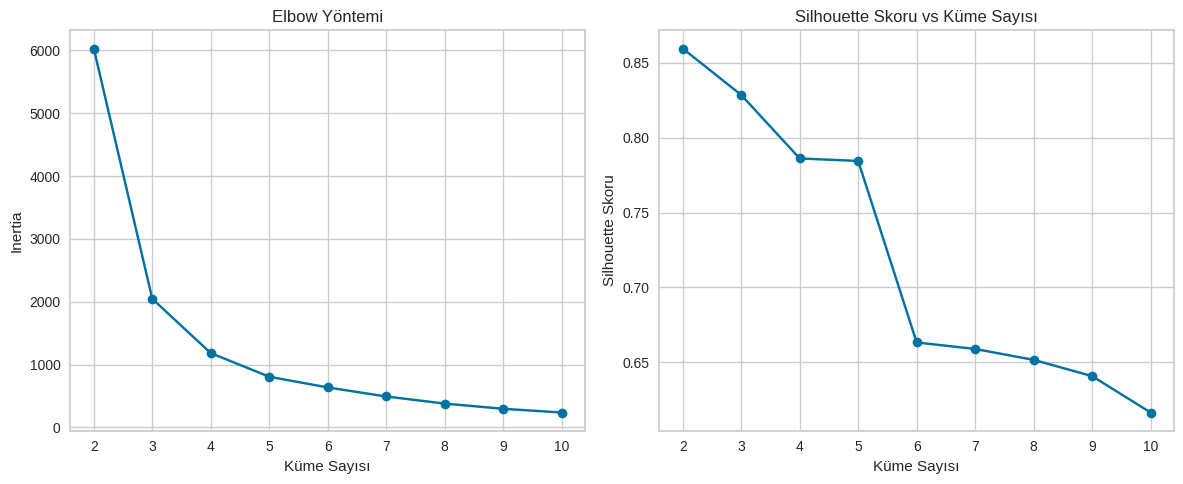

Optimal küme sayısı: 2


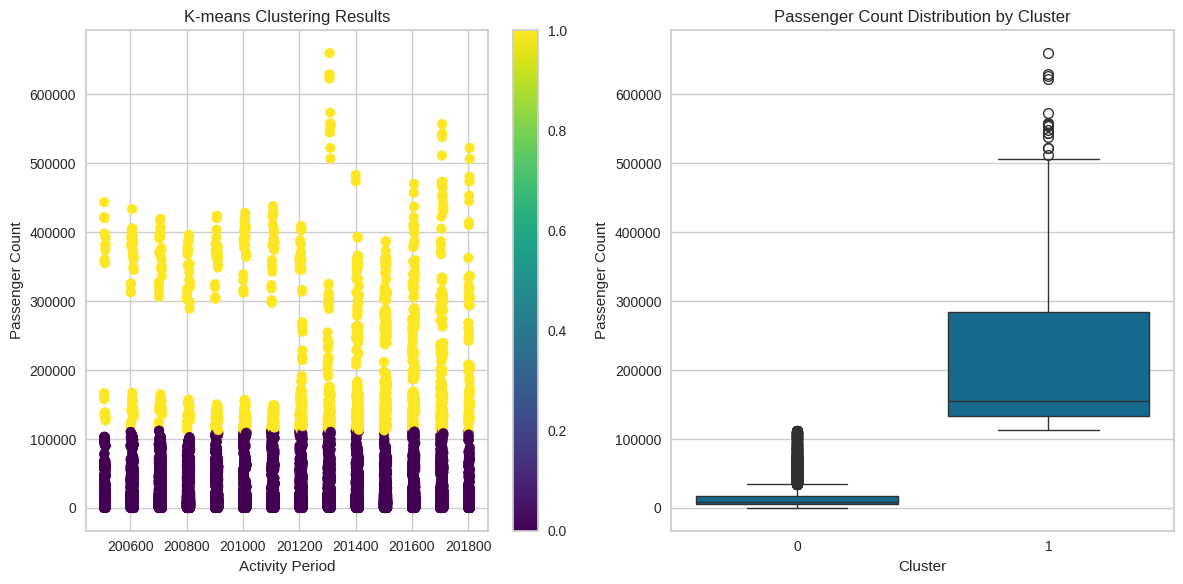

   Cluster  Mean Passengers  Min Passengers  Max Passengers  Count
0        0     15882.282174               1          112128  17514
1        1    208650.640408          112403          659837   1371
Final Silhouette Skoru: 0.8596


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
df2 = pd.read_csv('air-traffic-passenger-statistics.csv')

# Gerekli özellikleri seç
features = ['Passenger Count']
X = df2[features]

# Veriyi normalize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow yöntemi için farklı küme sayılarını dene
max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi')

# Silhouette skoru grafiği
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')
plt.title('Silhouette Skoru vs Küme Sayısı')

plt.tight_layout()
plt.show()

# Optimal küme sayısını seç (bu örnekte en yüksek silhouette skoruna sahip olan)
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal küme sayısı: {optimal_clusters}")

# Optimal küme sayısı ile K-means uygula
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_scaled)

# Sonuçları görselleştir
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(df2['Activity Period'], df2['Passenger Count'], c=df2['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Activity Period')
plt.ylabel('Passenger Count')
plt.title('K-means Clustering Results')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Passenger Count', data=df2)
plt.title('Passenger Count Distribution by Cluster')

plt.tight_layout()
plt.show()

# Küme istatistiklerini yazdır
cluster_stats = df2.groupby('Cluster').agg({
    'Passenger Count': ['mean', 'min', 'max', 'count']
}).reset_index()
cluster_stats.columns = ['Cluster', 'Mean Passengers', 'Min Passengers', 'Max Passengers', 'Count']
print(cluster_stats)

# Final Silhouette skorunu hesapla ve yazdır
final_silhouette_score = silhouette_score(X_scaled, df2['Cluster'])
print(f"Final Silhouette Skoru: {final_silhouette_score:.4f}")